# Regression Case Study: Predicting Compressive Strength of Concrete

**Group Members:** Charlton Ho S3845107, Kim Ta S3840049

# Introduction
Multiple linear regression is used to concrete predict compressive strength from research data comprised of quantitative measurements of age and ingredients. The dataset that had been used was sourced from UCI Machine Learning Repository at http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength (Yeh, 2007).

# Contents
- [Source & Description](#source-and-description)
- [Goals & Objectives](#goals-and-objectives)
- [Data Preparation](#data-preparation)
- [Data Exploration](#data-exploration)
- [Statistical Modeling & Performance Evaluation](#stat-modeling-and-performance-eval)
- [Summary & Conclusions](#summary-and-conclusions)

<a id='source-and-description'></a>
# Source and Description
## Data Source
The UCI Machine Learning Repository sources the dataset, `Concrete_Data` which contains 1030 observations. There are 9 attributes in this dataset, all of which are numerical. There are 8 descriptive input features and 1 target output feature. 
## Target feature
Our target feature is a continuous numerical feature: `the Concrete compressive strength`. We consider that the remaining 8 independent features may simultaneously contribute to this output. This project explores the regression problem that is the relationship between the independent variables and the target.
## Descriptive Features
Below are the all variable descriptions from the Concrete_data file:

**Table 1: Variables in Concrete_data**

| Name | Data type | Units | Description |
| ---- | --------- | ----- | ----------- |
| **`Cement`** | numerical, continuous | kg/$\text{m}^3$ | Mass of cement per $\text{m}^3$ mixture |
| **`Blast Furnace Slag`** | numerical, continuous | kg/$\text{m}^3$ | Mass of blast furnace slag per $\text{m}^3$ mixture |
| **`Fly Ash`** | numerical, continuous | kg/$\text{m}^3$ | Mass of fly ash per $\text{m}^3$ mixture |
| **`Water`** | numerical, continuous | kg/$\text{m}^3$ | Mass of water per $\text{m}^3$ mixture |
| **`Super Plasticizer`** | numerical, continuous | kg/$\text{m}^3$ | Mass of super plasticizer per $\text{m}^3$ mixture |
| **`Coarse Aggregate`** | numerical, continuous | kg/$\text{m}^3$ | Mass of coarse aggregate per $\text{m}^3$ mixture |
| **`Fine Aggregate`** | numerical, continuous | kg/$\text{m}^3$ | Mass of fine aggregate per $\text{m}^3$ mixture|
| **`Age`** | numerical, discrete | day | Number of days since mixture was made |

Most descriptive variables are masses of an ingredient in a $\text{m}^3$ of concrete mixture. `Age` refers to the age of a tested concrete instance. This factor was considered because over time, concrete mixtures solidify and toughen. This increases their resistence to compressive forces and therefore,  affects their compressive strength. Although temporal variables are usually discrete, Age is discrete in this dataset because it had been limited to discrete counts in days.

<a id='goals-and-objectives'></a>
# Goals and Objectives
## Project Objective
Our objective is to determine if compressive strength of concrete can be predicted within a sufficiently small margin of error, through the use of multiple linear regression statistics. 

<a id='data-preparation'></a>
# Data Preparation
## Preliminaries
We will first import all the common modules used in our case study.

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

We download the test dataset obtained from the URL sourced above and covert it to a csv file. Before reading the data file, we modified the column headings to take out any unnecessary information when analysing the data. Then we check the number of rows and columns this data source has and output 10 randomly sampled data sets.

In [2]:
#Specifying column names
columnNames = [
    'cement',
    'blast-furnace-slag',
    'fly-ash',
    'water',
    'superplasticizer',
    'coarse-aggregate',
    'fine-aggregate',
    'age',
    'concrete-compressive-strength'
]

# Read Data
data = pd.read_csv('Concrete_Data.csv', names = columnNames, skiprows = 1)

#Total number of rows and columns
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

# Display randomly sampled 10 rows
display(HTML('<b>Table 2: Random 10 rows of Concrete data</b>'))
data.sample(10)

There are 1030 rows and 9 columns


,cement,blast-furnace-slag,fly-ash,water,superplasticizer,coarse-aggregate,fine-aggregate,age,concrete-compressive-strength
443,194.7,0.0,100.5,170.2,7.5,998.0,901.8,28,37.27
622,307.0,0.0,0.0,193.0,0.0,968.0,812.0,365,36.15
221,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,28,21.54
983,136.4,161.6,125.8,171.6,10.4,922.6,764.4,28,29.07
820,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,270,67.11
720,203.5,305.3,0.0,203.5,0.0,963.4,630.0,90,51.86
46,349.0,0.0,0.0,192.0,0.0,1047.0,806.9,3,15.05
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,56.14
378,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,100,43.06
165,425.0,106.3,0.0,151.4,18.6,936.0,803.7,91,66.70


## Data Cleaning and Transformation
We first confirm that the feature types match the description outlined in the data documentation.

In [3]:
print("Data types are shown below: ")
print(data.dtypes)

Data types are shown below: 
cement                           float64
blast-furnace-slag               float64
fly-ash                          float64
water                            float64
superplasticizer                 float64
coarse-aggregate                 float64
fine-aggregate                   float64
age                                int64
concrete-compressive-strength    float64
dtype: object


In [4]:
display(HTML('<b>Table 3: Statistics on each data type</b>'))
round(data.describe(include = np.number), 2)

,cement,blast-furnace-slag,fly-ash,water,superplasticizer,coarse-aggregate,fine-aggregate,age,concrete-compressive-strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


A histogram for `concrete-compressive-strength` was plotted to see if there are any outliers that lie within the data file.

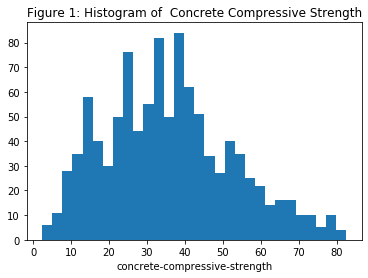

In [5]:
plt.hist(data['concrete-compressive-strength'], bins = 30)
plt.xlabel('concrete-compressive-strength')
plt.title('Figure 1: Histogram of  Concrete Compressive Strength')
plt.show();

## Checking for Negative Values
Let's check if our dataset contains any negative values as they would not be useful in our analysis.

In [6]:
print(f'''Number of negative values for each feature:

cement: {data[data['cement']<0].shape[0]}
blast-furnace-slag: {data[data['blast-furnace-slag']<0].shape[0]}
fly-ash: {data[data['fly-ash']<0].shape[0]}
water: {data[data['water']<0].shape[0]}
superplasticizer: {data[data['superplasticizer']<0].shape[0]}
coarse-aggregate: {data[data['coarse-aggregate']<0].shape[0]}
fine-aggregate: {data[data['fine-aggregate']<0].shape[0]}
age: {data[data['age']<0].shape[0]}
concrete-compressive-strength: {data[data['concrete-compressive-strength']<0].shape[0]}''')

Number of negative values for each feature:

cement: 0
blast-furnace-slag: 0
fly-ash: 0
water: 0
superplasticizer: 0
coarse-aggregate: 0
fine-aggregate: 0
age: 0
concrete-compressive-strength: 0


There are no negative values contained in the dataset.

## Checking for Missing Values

In [7]:
print(f'Number of missing values for each feature: ')
print(data.isna().sum())

Number of missing values for each feature: 
cement                           0
blast-furnace-slag               0
fly-ash                          0
water                            0
superplasticizer                 0
coarse-aggregate                 0
fine-aggregate                   0
age                              0
concrete-compressive-strength    0
dtype: int64


No attribute in the data file contains any missing values.

## Fixing Column Names
The column names were modified with minus signs in them. Therefore, we need to replace every minus sign with an underscore sign in the column names.

In [8]:
data.columns = [colname.replace('-', '_') for colname in list(data.columns)]

data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<a id='data-exploration'></a>
# Data Exploration
Our dataset is now considered "clean" and is ready for statistical modeling and analysis.

## Univariate Visualisation
Let's get a bar chart of the age of a tested concrete instance the data records. The bar chart in **Figure 2** shows us that majority of the records are taken from 28 days since the concrete mixture was made.

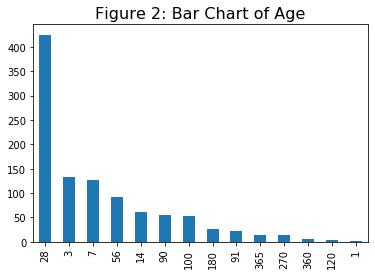

In [9]:
age_hist = data['age'].value_counts().plot(kind = 'bar')
age_hist.set_xticklabels(age_hist.get_xticklabels(), rotation = 90)
plt.tight_layout
plt.title('Figure 2: Bar Chart of Age', fontsize = 16)
plt.show();

We will also look at the boxplot for `age` in the dataset. **Figure 3** reveals that this variable is right skewed.

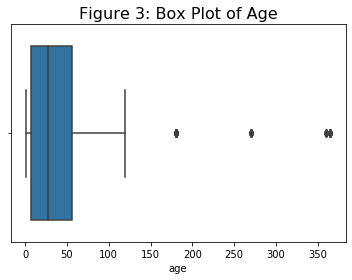

In [10]:
sns.boxplot(data['age']).set_title('Figure 3: Box Plot of Age', fontsize = 16)
plt.show();

We will now look at our main target feature: `concrete-compressive strength`. Recall the histogram of `concrete-compressive strength`. **Figure 4** and **Figure 5** show that the histogram is right skewed.

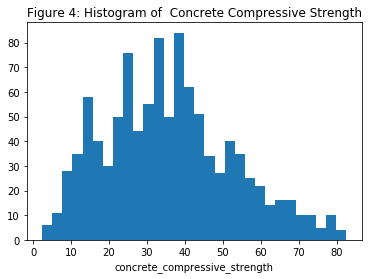

In [11]:
plt.hist(data['concrete_compressive_strength'], bins = 30)
plt.xlabel('concrete_compressive_strength')
plt.title('Figure 4: Histogram of  Concrete Compressive Strength')
plt.show();

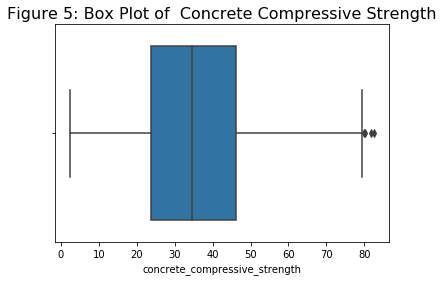

In [12]:
sns.boxplot(data['concrete_compressive_strength']).set_title('Figure 5: Box Plot of  Concrete Compressive Strength', fontsize = 16)
plt.show();

## Multivariate Visualisation
### Comparison of Concrete Compressive Strength and concrete ingredients
Let's compare the concrete ingredients with the Concrete Compressive Strength of the mixture.

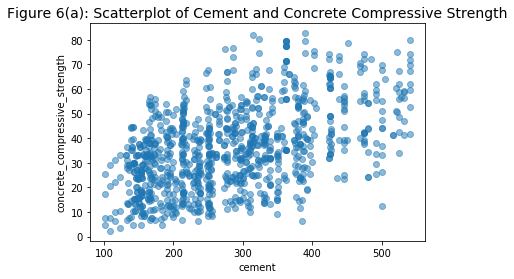

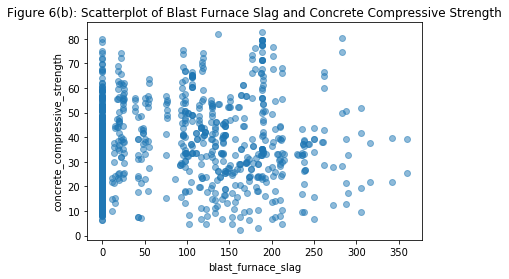

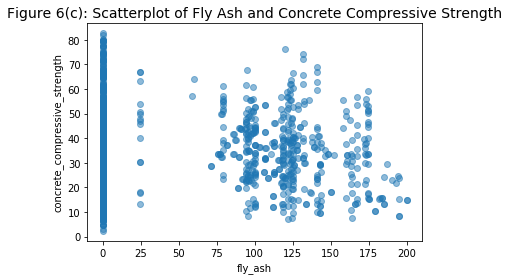

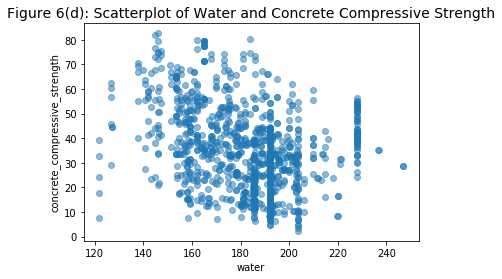

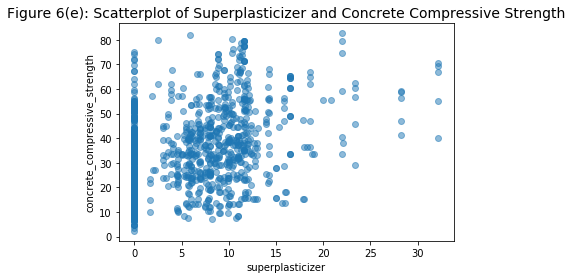

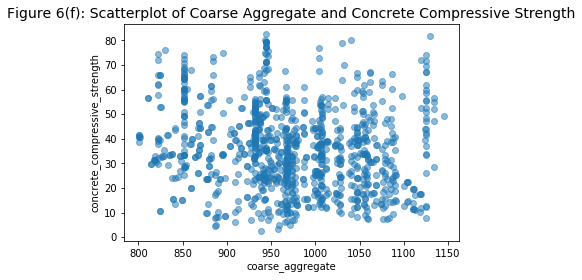

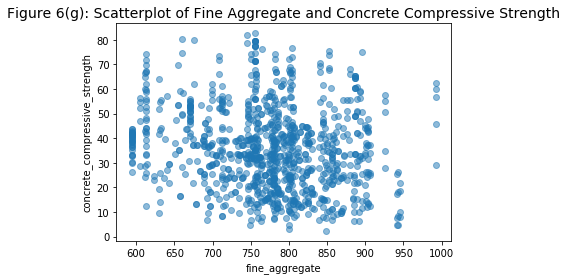

In [13]:
# Cement and Concrete Compressive Strength
plt.scatter(data['cement'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(a): Scatterplot of Cement and Concrete Compressive Strength', fontsize = 14)
plt.xlabel('cement')
plt.ylabel('concrete_compressive_strength')
plt.show();

# Blast Furnace Slag and Concrete Compressive Strength
plt.scatter(data['blast_furnace_slag'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(b): Scatterplot of Blast Furnace Slag and Concrete Compressive Strength', fontsize = 12)
plt.xlabel('blast_furnace_slag')
plt.ylabel('concrete_compressive_strength')
plt.show();

# Fly Ash and Concrete Compressive Strength
plt.scatter(data['fly_ash'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(c): Scatterplot of Fly Ash and Concrete Compressive Strength', fontsize = 14)
plt.xlabel('fly_ash')
plt.ylabel('concrete_compressive_strength')
plt.show();

# Water and Concrete Compressive Strength
plt.scatter(data['water'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(d): Scatterplot of Water and Concrete Compressive Strength', fontsize = 14)
plt.xlabel('water')
plt.ylabel('concrete_compressive_strength')
plt.show();

# Superplasticizer and Concrete Compressive Strength
plt.scatter(data['superplasticizer'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(e): Scatterplot of Superplasticizer and Concrete Compressive Strength', fontsize = 14)
plt.xlabel('superplasticizer')
plt.ylabel('concrete_compressive_strength')
plt.show();

# Coarse Aggregate and Concrete Compressive Strength
plt.scatter(data['coarse_aggregate'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(f): Scatterplot of Coarse Aggregate and Concrete Compressive Strength', fontsize = 14)
plt.xlabel('coarse_aggregate')
plt.ylabel('concrete_compressive_strength')
plt.show();

# Fine Aggregate and Concrete Compressive Strength
plt.scatter(data['fine_aggregate'], data['concrete_compressive_strength'], alpha = 0.5)
plt.title('Figure 6(g): Scatterplot of Fine Aggregate and Concrete Compressive Strength', fontsize = 14)
plt.xlabel('fine_aggregate')
plt.ylabel('concrete_compressive_strength')
plt.show();

**Figure 6(a)** shows us that more Cement in the mixture is more likely to have a greater concrete compressive strength. **Figure 6(b)** gives an indication that less Blast Furnace Slag is more likely to have a stronger compressive strength. **Figure 6(c)** reveals that if Fly Ash is included in the mixture, the amount used should not be too little nor too much to have a greater compressive strength. **Figure 6(d)** shows us that water is an ingredient that is likely to be necessary in the concrete mixture for a greater compressive strength, but is not needed in great amount. **Figure 6(e)** shows us that not a lot of superplasticizer was used to gather data, but by looking at the numbers, greater numbers of superplasticizer could have a stronger compressive strength, however there's not enough evidence in the given dataset to support it. **Figure 6(f)** shows a spread out use of coarse aggregate tested in the mixture, where we can assume that other ingredients will impact the compressive strength more than the coarse aggregate as the data is quite symmetric. **Figure 6(g)** also shows a spread out scatterplot how and we can assume that the other ingredients will be more of an impact in the mixture. However, both course aggregate and fine aggregate were used in high amounts within the mixture which could play a big role overall to the concrete compressive strength.

## Summary Statistics

In [14]:
display(HTML('<b>Table 4: Summary of continuous features</b>'))
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<a id='stat-modeling-and-performance-eval'></a>
# Statistical Modeling and Performance Evaluation

## Full Model
Here is the first 5 rows of the clean data:

In [15]:
display(HTML('<b>Table 5: First 5 rows of Concrete data</b>'))
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


We will obtain the full model of the dataframe, where we will use all the available features. The full model will fit a multiple linear regression for the perdiction of the dependent variable, `concrete_compressive_strength`.

First, we construct a formula string for all the independent variables that determine the dependent variable. This is required for getting the regression formula when dealing with many independent variables in a dataset.

In [16]:
formula_string_indep_vars = ' + '.join(data.drop(columns='concrete_compressive_strength').columns)
formula_string = 'concrete_compressive_strength ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  concrete_compressive_strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age


When water is mixed with cement, a paste forms which binds together the aggregate (Lewis et al, n.d.). So the interaction between the cement feature and water feature should be considered.

These interaction terms will be added to the full model.

In [17]:
formula_string_encoded = formula_string + ' + cement:water'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  concrete_compressive_strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age + cement:water


Since the statistical model formula has been defined as a Python string, we obtain the full model by fitting an OLS (ordinary least squares) model to the encoded data.

In [18]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data)

model_full_fitted = model_full.fit()

print(model_full_fitted.summary())

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.616
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     181.5
Date:                           Wed, 17 Aug 2022   Prob (F-statistic):          8.88e-205
Time:                                   15:58:35   Log-Likelihood:                -3868.9
No. Observations:                           1030   AIC:                             7758.
Df Residuals:                               1020   BIC:                             7807.
Df Model:                                      9                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [19]:
print('R-squared: ', round(model_full_fitted.rsquared, 4))

R-squared:  0.6156


The full model for this dataframe has an adjustd R-squared value of 0.612. So, the model only explains ~60% of the variance. It can be inferred from the P>|t| column that most of the p-values are statistically significant (p < 0.05), except for few insignificant variables at a 5% significance level (i.e., course_aggregate, fine_aggregate).

The output concrete_compressive_strength can be plotted against the regression residuals. To help compare the predicted concrete_compressive_strength vs actual concrete_compressive_strength, let's include both in a newly defined dataframe.

In [38]:
residuals_full = pd.DataFrame({'actual': data['concrete_compressive_strength'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
display(HTML('<b>Table 6: Actual vs Predicted Concrete Compressive Strength for the Full Model</b>'))
residuals_full.head(10)

,actual,predicted,residual
0,79.99,53.758827,26.231173
1,61.89,54.030449,7.859551
2,40.27,56.768068,-16.498068
3,41.05,67.635867,-26.585867
4,44.30,60.987688,-16.687688
5,47.03,26.922764,20.107236
6,43.70,68.296112,-24.596112
7,36.45,29.744028,6.705972
8,45.85,19.830096,26.019904
9,39.29,31.064520,8.225480


Now we can plot the predicted Concrete Compressive Strength against its actual counterpart.

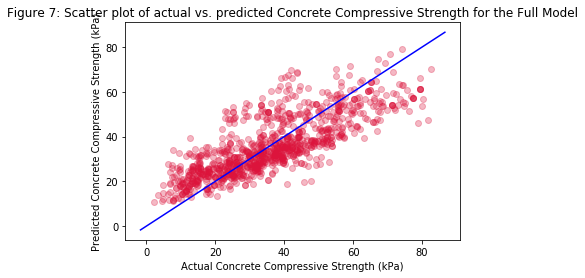

In [21]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3, c="crimson");
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue");
plt.xlabel('Actual Concrete Compressive Strength (kPa)');
plt.ylabel('Predicted Concrete Compressive Strength (kPa)');
plt.title('Figure 7: Scatter plot of actual vs. predicted Concrete Compressive Strength for the Full Model');
plt.show();

**Figure 6** shows prediction for Concrete Compressive Strength to be at least 10 kPa. Although actual data on Concrete Compressive Strength that the minimum Concrete Compressive Strength can be lower than 10 kPa.

In [22]:
print(f'''
Range for predicted and actual Concrete Compressive Strength (in kPa):
Predicted range: [{round(residuals_full['predicted'].min(), 2)}, {round(residuals_full['predicted'].max(), 2)}]
Actual range: [{round(residuals_full['actual'].min(), 2)}, {round(residuals_full['actual'].max(), 2)}]
''')


Range for predicted and actual Concrete Compressive Strength (in kPa):
Predicted range: [10.6, 79.23]
Actual range: [2.33, 82.6]



The minimum prediction for Concrete Compressive Strength is 10.6 kPa, but the minimum Concrete Compressive Strength in the actual dataframe is 2.33 kPa. The actual minimum is lower than the predicted minimum. As for the maximum results, the maximum preidction for Concrete Compressive Strength is slightly lower than the actual maximum.

We will now run diagnostic checks for the full model.

## Full Model Diagnostic Checks

We must first check for indications of violations of the regression assumptions:

linearity of the relationship between target variable and the independent variables
constant variance of the errors
normality of the residual distribution
statistical independence of the residuals

Let's plot the residuals by Concrete Compressive Strength.

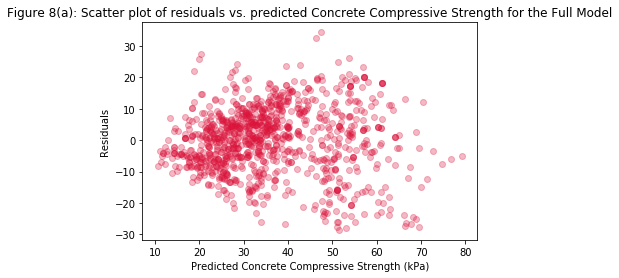

In [23]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3, c="crimson");
plt.xlabel('Predicted Concrete Compressive Strength (kPa)');
plt.ylabel('Residuals')
plt.title('Figure 8(a): Scatter plot of residuals vs. predicted Concrete Compressive Strength for the Full Model')
plt.show();

**Figure 8(a)** shows the plot for residuals by predicted output is mostly random and centered around 0. There is evidence of both underestimates and overestimates in the value of Concrete Compressive Strength. The model tends to predict more values occurring under 40 kPa.

Let's plot the residuals by actual Concrete Compressive Strength.

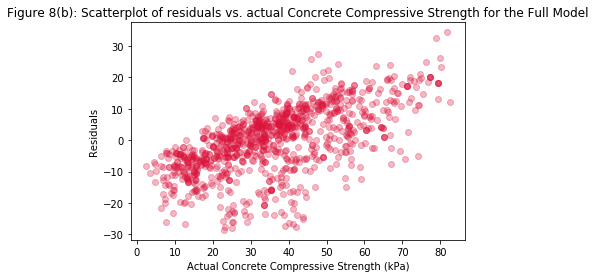

In [24]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3, c='crimson');
plt.xlabel('Actual Concrete Compressive Strength (kPa)');
plt.ylabel('Residuals')
plt.title('Figure 8(b): Scatterplot of residuals vs. actual Concrete Compressive Strength for the Full Model')
plt.show();

**Figure 8(b)** shows that the model overestimates lower compressive strength of concrete, and underestimates higher compressive strength. The model predicts much higher values for tested concrete samples with under 20 kPa compressive strength. The model predicts significantly lower values for samples with over 70 kPa compressive strength.

Let's plot an overlay of the actual vs predicted Concrete Compressive Strength as histograms.

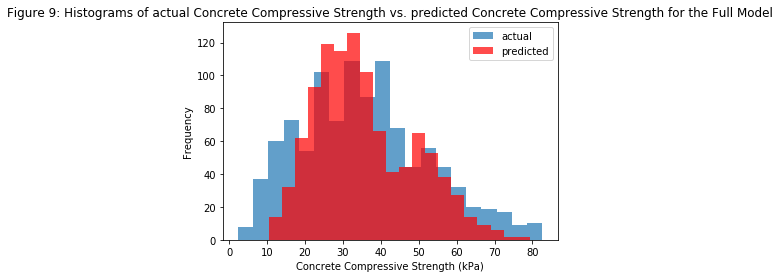

In [25]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7, color='r');
plt.xlabel('Concrete Compressive Strength (kPa)');
plt.ylabel('Frequency');
plt.title('Figure 9: Histograms of actual Concrete Compressive Strength vs. predicted Concrete Compressive Strength for the Full Model');
plt.legend()
plt.show();

The distributions of the actual and predicted values are not very different according to **Figure 9**. The predicted range is slightly narrower than the actual range.

Let's plot the histogram of the residuals.

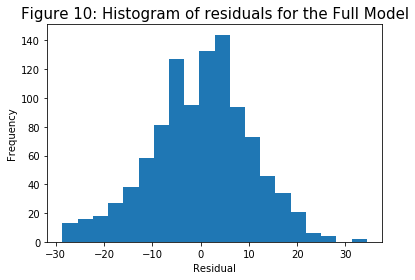

In [26]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 10: Histogram of residuals for the Full Model', fontsize=15);
plt.show();

The histogram in **Figure 10** looks approximately symmetric, which suggests that the residuals are somewhat normally distributed.

## Backwards Feature Selection

We will use the following code from Regression Case Study from featureranking.com to perform backwards feature selection with p-values.

In [27]:
data_encoded = data

In [28]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "cement:water" with p-value 0.7662

Removing term "fine_aggregate" with p-value 0.05949

Removing term "coarse_aggregate" with p-value 0.519

***
                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.614
Model:                                       OLS   Adj. R-squared:                  0.612
Method:                            Least Squares   F-statistic:                     271.2
Date:                           Wed, 17 Aug 2022   Prob (F-statistic):          1.67e-207
Time:                                   15:58:36   Log-Likelihood:                -3871.0
No. Observations:                           1030   AIC:                             7756.
Df Residuals:                               1023   BIC:                             7790.
Df Model:                                      6               

Let's define a new dataframe, a reduced model for actual vs predicted Concrete Compressive Strength. Likewise to what we had done for the full model, residuals should be included for comparison.

In [37]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['concrete_compressive_strength'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
display(HTML('<b>Table 7: Actual vs Predicted Concrete Compressive Strength for the Reduced Model</b>'))
residuals_reduced.head(10)

,actual,predicted,residual
0,79.99,54.364477,25.625523
1,61.89,54.364477,7.525523
2,40.27,57.283825,-17.013825
3,41.05,68.065554,-27.015554
4,44.30,60.361053,-16.061053
5,47.03,27.380854,19.649146
6,43.70,68.965292,-25.265292
7,36.45,30.718526,5.731474
8,45.85,20.344357,25.505643
9,39.29,32.518002,6.771998


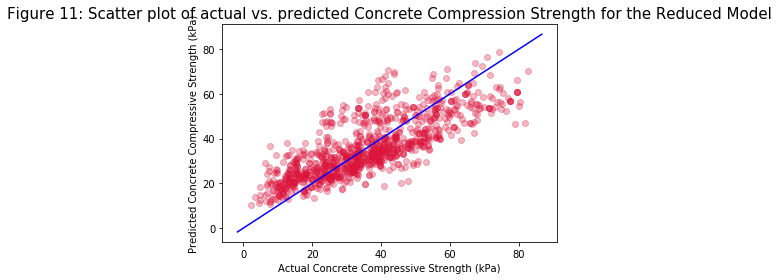

In [33]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3, c='crimson');
plot_line(axis=plt.gca(), slope=1, intercept=0, c='b');
plt.xlabel('Actual Concrete Compressive Strength (kPa)');
plt.ylabel('Predicted Concrete Compressive Strength (kPa)');
plt.title('Figure 11: Scatter plot of actual vs. predicted Concrete Compression Strength for the Reduced Model', fontsize=15);
plt.show();

The adjusted R-sqared of this model is 0.612, so the reduced model still explains about 60% of the variance, as did the full model. However, three features that had a p-value exceeding the cut-off p-value of 5% had been removed during the backwards selection of features. **Figure 11** remains to show the same issues as in the full model, where the lower actual Concrete Compressive Strength values are overestimated, while the higher actual values are being underestimated.

## Reduced Model Diagnostic Checks

As done for the full model, let's plot the residuals as a function of predicted Concrete Compressive Strength.

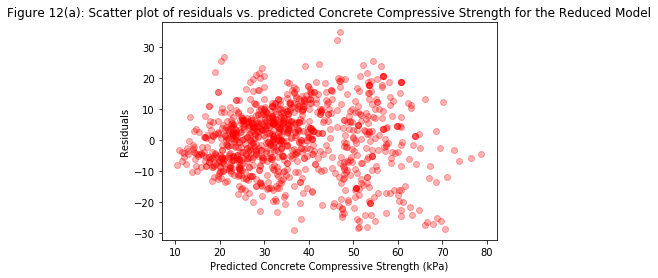

In [41]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3, c='r');
plt.xlabel('Predicted Concrete Compressive Strength (kPa)');
plt.ylabel('Residuals')
plt.title('Figure 12(a): Scatter plot of residuals vs. predicted Concrete Compressive Strength for the Reduced Model')
plt.show();

**Figure 12(a)** remains similar to **Figure 8(a)**.

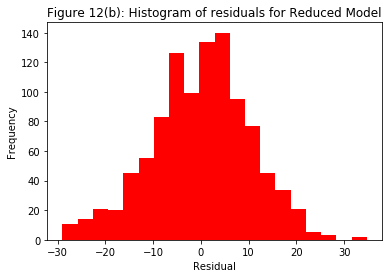

In [42]:
plt.hist(residuals_reduced['residual'], bins = 20, color='r');
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12(b): Histogram of residuals for Reduced Model')
plt.show();

The histogram in **Figure 12(b)** is also similar to **Figure 10**. The same symmetry suggests that the residuals are somewhat normally distributed.

<a id='summary-and-conclusions'></a>
# Summary and Conclusions

Using our independent variables, we were able to get a full model with an Adjusted R-squared value of about 60%. After the backwards variable selection with a p-value cutoff value of 0.05, we were able to maintain the same performance but with 3 less variables. Our final model has a total of 7 variables with a model p-value of 0. Diagnostic checks with our residual scatter plots reveal that the predicted output is mostly random and centered around 0, further underestimating and overestimating the value of Concrete Compressive Strength, where the model illustrated tends to anticipate values under 40 kPa. In contrast, the residuial histograms suggest that there are no significant violations of the normality assumption on the residuals. The final multiple linear regression model has an Adjusted R-squared value of about 60%, which is a satisfiable figure. However to improve on this figure, we could add in some higher order terms which may improve the adjusted R-squared value. As such, our regression model appears to predict the Concrete Compressive Strength correctly within $\pm60$ kPa. However, there are still issues that remain in the model where it tends to overestimate the actual lower Concrete Compressive Strength values, particularly under 20 kPa and underestimate the actual higher values that are over 70 kPa.

# References

- Lewis, J., Adams, J., Young, F., Lange, D., Chamberlain, B., Chiesl, N., Day, J., Dowd, L., Overocker, B., Pape, D., Petrus, M., Swanson, M., Toles, J. (n.d.). *Concrete*. http://matse1.matse.illinois.edu/concrete/prin.html#:~:text=Water%20is%20the%20key%20ingredient,through%20a%20process%20called%20hydration.&text=Too%20much%20water%20reduces%20concrete,will%20make%20the%20concrete%20unworkable.

- Yeh, I. (2007). *Concrete Compressive Strength Data Set*. http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

- featureranking. (n.d.). *Regression Case Study*. https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/